In [3]:
import qiskit
import qiskit_ibm_runtime

HELLO WORLD PLAYLIST

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


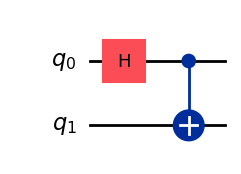

In [4]:
from qiskit import QuantumCircuit, transpile

# Create a Quantum cicruit with 2 qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply a controlled X-gate on qubit 1, controlled by qubit 0
qc.cx(0,1)

qc.draw("mpl")

DIEGO'S DOUBLE SLIT EXPERIMENT

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

simulator = AerSimulator()

In [11]:
# Define a constant and a parameter
pi = np.pi
phi = Parameter('phi')

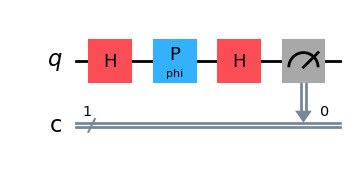

In [12]:
# Create a circuit with 1 quibit and 1 classical bit
qc = QuantumCircuit(1,1)

# Apply a H gate
qc.h(0)

# Apply a Phase gate with a parameter phi to qubit 0
qc.p(phi, 0)

# Apply a H gate
qc.h(0)

# Measure qubit 0 and project onto the classical bit 0
qc.measure(0,0)

qc.draw('mpl')


In [13]:
# Transpile the circuit
qc_trans = transpile(qc, backend=simulator)

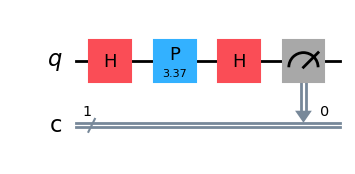

In [18]:
runs = 8192 # Usually a power of 2 
phi_scrn = 6*pi
phi_list = np.random.uniform(-phi_scrn/2, phi_scrn/2, runs) # Randomly select phi values uniformly

circuits = [] # Empty circuits list to append with different phi values 

for phi_val in phi_list: # For loop to feed in the phi values
    qc_sim = qc_trans.assign_parameters({phi: phi_val}) # Assign the phi param
    circuits.append(qc_sim) # Append the circuits list

circuits[3].draw("mpl")

In [19]:
# Run the simulator with a list of circuits, each with 1 shot
job = simulator.run(circuits, shots=1, memory=True)

# Save the results as sim_results
sim_results = job.result()

In [21]:
phi_hit = [] # Empty list to store the results that hit the screen (state 0)

for i, circ in enumerate(circuits):
    result = sim_results.get_memory(circ)[0] # Calls the result of the 0th index of the first circuit 
    if result == '0':
        phi_hit.append(phi_list[i]) # If the result is equalt to 0 (hit the screen), append the corresponding phi_value that hit the screen

In [22]:
# Arbirarily selecting a value for the z coordinate for the screen
z_hit = np.random.uniform(-1, 1, len(phi_hit))

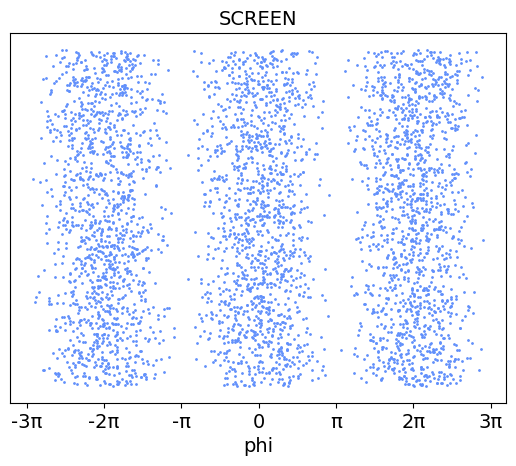

In [23]:
plt.scatter(phi_hit, z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft = False)
plt.xticks(ticks = [-3*pi, -2*pi, -pi, 0, pi, 2*pi, 3*pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'], fontsize=14)
plt.xlabel('phi', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()